

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data distributions where Kmeans clustering fails, DBSCAN clustering can be a solution


#### Hana Bachi (hb22978)

#### Petroleum Engineering, School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary 

Clustering involves grouping data points by similarity. In unsupervised machine learning, for example, data points are grouped into clusters depending on the information available in the dataset. The samples in the same clusters are similar to each other, while the items in different clusters are dissimilar. KMeans and DBSCAN represent two of the most popular clustering algorithms. They are both simple to understand and difficult to implement, but DBSCAN is a bit simpler.

For Kmeans clustering to work well, these assumptions have to hold true: the variance of the distribution of each attribute (variable) is spherical, all variables have the same variance and the prior probability for all k clusters is the same, i.e. each cluster has a roughly equal number of observations. If any one of these 3 assumptions is violated, then k-means does not do a good job. Here, we will utilize three different data set distributions to test and demonstrate the efficiency of K-means and DBSCAN clustering. These three data distributions are cases to explore if DBSCAN clustering can be a solution where K-means clustering fails. The three cases that we will target in our study are clusters with uneven sizes, non-spherical distribution, and non-spherical data with outliers.

We will learn that the DBSCAN clustering method can work well for datasets with lots of noise, Can identify outliers easily and clustering is a statistical technique that provides a partitioning of data points into many clusters. Unlike K-Means, it does not produce a spherical-shaped cluster, and the outliers can disrupt the operation of the algorithm. This is because outliers can cause centroids to get dragged and this causes clusters to get skewed.

## Table of Contents
    1- Import packages    
    2- Load & Preprocess Data
    
    3- K-mean clustering    
       a. Clusters with uneven sizes
       b. Non-spherical distribution
       c. Non-spherical data with outliers
       
    4- DBSCAN clustering
       a. Clusters with uneven sizes
       b. Non-spherical distribution
       c. Non-spherical data with outliers
 



### 1. Import Packages

Here we will import several Python packages, which are basically a collection of modules. The purpose of each package has been addressed in the comments below.

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mc
%matplotlib inline
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies

Import other important packages for preprocessing, metrics, etc., and project-specific packages and functions

In [2]:
from sklearn.neighbors import NearestNeighbors # nearest neighbours function to calculate eps hyperparameter
from sklearn.preprocessing import MinMaxScaler # min/max normalization
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans        # k-means clustering
from sklearn.cluster import DBSCAN        # DBSCAN clustering              
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import sys                                              # supress output to screen for interactive variogram modeling
import io 
cmap = plt.cm.inferno    


### 2. Load & Preprocess Data
We will deal with four different datasets, three of which need preprocessing.

(1) Clusters with uneven sizes  (2) Non-spherical distribution   (3) Non-spherical data with outliers  (4) Interactive DBSCAN clustering  

Let's load the provided three datasets.  It is a comma delimited file with: 

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

Also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specify the name/variable representing that new object.

```python
df1 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp1.csv')
exp2 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp2.csv')
df3 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/example3.csv')
multishapes = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/multishape.csv')

```

### 3. K-means clustering

One of the most popular and easy-to-understand algorithms for clustering. Basically, it tries to “circle” the data in different groups based on the minimal distance of the points to the centers of these clusters. Check out this cool animation of the process.

How it works:

* Choose the number of clusters (let’s say you want k clusters).
* Choose k random points for the cluster centers.
* Assign the data points to the closest cluster center.
* Recompute the cluster centers by calculating the mean of the distance of all points belonging to the current cluster.
* Repeat until no new centers are assigned or all points remain in the same cluster.

The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from, although they live in the same space.

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:

\begin{equation}    
 {\sum_{i = 0}^{n} min_{µ_{j} ЄC}\left(||x_{i} - µ_{j}||^2\right)} 
\end{equation}
 
* Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters or manifolds with irregular shapes.

* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In this study, we first start with k-means clustering. 

* We use k-means to baseline the subsequent approaches that we will attempt.

the assumptions of k-means clustering are:

* spherical variability over the features

* same variability over each feature (after our min/max normalization)

* prior probability of membership in all clusters, an equal number of samples in each

This dataset violates these assumptions with non-spherical shapes, uneven clusters sizes, and non-spherical shapes with outliers

### 4-a Clusters with uneven sizes
For the first case of the study, we are using clusters with uneven sizes. As shown below, the K-means algorithm does not work well with unevenly sized clusters. 
First, we need to load the data named 'df1'

In [66]:
df1 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp1.csv')
df1 = df1.iloc[:,1:8]                             # copy all rows and columns 1 through 8, note 0 column is removed
df1.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
x,619.0,5.521330,1.464882,-0.966617,4.711403,5.789266,6.521709,8.571458
y,619.0,5.017932,2.444589,-1.601536,4.699483,5.785495,6.459189,9.184044


The second step is to run the K-mean clustring algorithm for this unevenly sized clusters and check the cluster distribution over this dataset. We can see from the plot that K-means clustering method does follow the number of events by cluster. This explains the unability of K-means method to well generate the clusters in unevenly sized clusters data set.

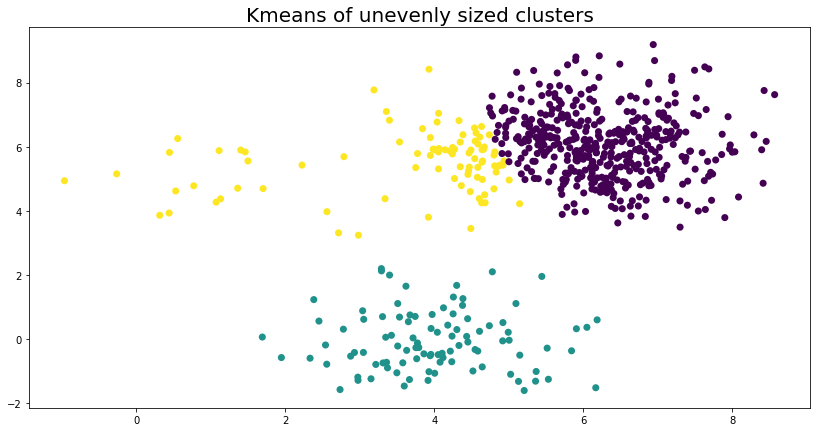

In [5]:
df1 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp1.csv')
km = KMeans(n_clusters=3).fit(df1)
labels =  km.labels_
x = df1.values[:,1]
y = df1.values[:,2]
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=labels,cmap='viridis',s=50,edgecolor='none')
plt.title('Kmeans of unevenly sized clusters', fontsize = 20)
plt.show()

### 4-b Non-spherical distribution
In the second case, we are exploring the efficiency of the K-mean clustering method with non-spherical data distribution. We start by loading the data.

In [9]:
exp2 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp2.csv')
exp2 = exp2.iloc[:,1:8]                             # copy all rows and columns 1 through 8, note 0 column is removed
exp2.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
y,500.0,0.052745,2.576892,-5.475657,-1.288303,0.0081,1.216374,5.540763
cluster,500.0,1.490000,0.500401,1.000000,1.000000,1.0000,2.000000,2.000000


Then we run the k-means clustering for this data named 'exp2' as shown below. As we can see from the plot below, K-means clustering is unable to properly distinguish between the non-spherical clusters.

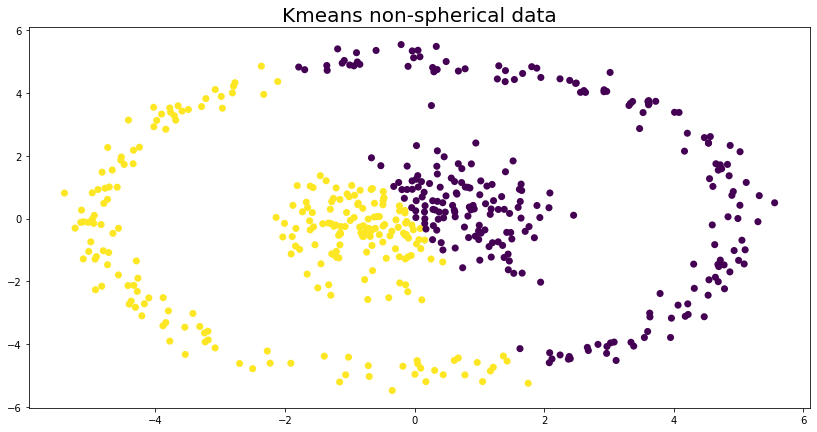

In [11]:
exp2 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/exp2.csv')
km = KMeans(n_clusters=2).fit(exp2)
labels =  km.labels_
x = exp2.values[:,0]
y = exp2.values[:,1]
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=labels,cmap='viridis',s=50,edgecolor='none')
plt.title('Kmeans non-spherical data', fontsize = 20)
plt.show()


### 4-c Non-spherical data with outliers
The third case is running K-mean clustering with non-spherical data with outliers. The first step is to load data named df3 as it is shown below:

In [68]:
df3 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/example3.csv')
df3 = df3.iloc[:,1:8]                             # copy all rows and columns 1 through 8, note 0 column is removed
df3.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
y,1100.0,-0.625431,1.176170,-3.353462,-1.126752,-0.29704,0.250817,1.253874
cluster,1100.0,3.238182,1.488688,1.000000,2.000000,4.00000,4.250000,5.000000


Let's now run the K-mean clustering algorithm as below. From this plot, the k-means clustering is not able to distinguish the outliers and also the non-spherical clusters.

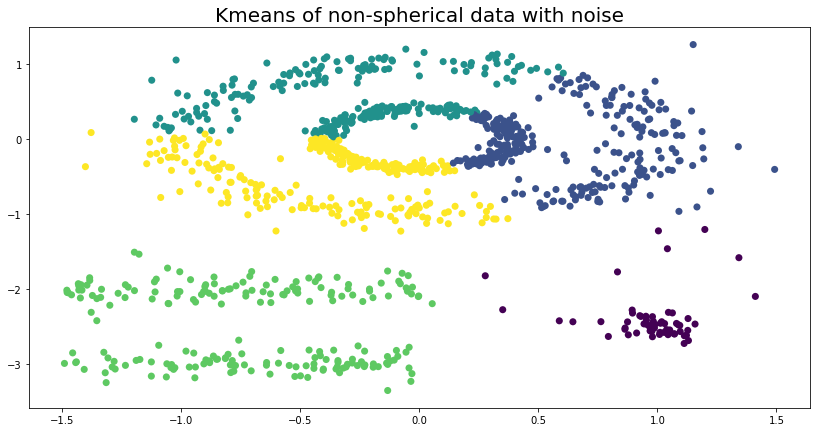

In [14]:
df3 = pd.read_csv(r'https://raw.githubusercontent.com/HanaBachi/MachineLearning/main/example3.csv')
km = KMeans(n_clusters=5).fit(df3)
labels =  km.labels_
x = df3.values[:,0]
y = df3.values[:,1]
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=labels,cmap='viridis',s=50,edgecolor='none')
plt.title('Kmeans of non-spherical data with noise', fontsize = 20)
plt.show()

## 5. DBSCAN Clustering
Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities, and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method. 

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.
Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real-life data may contain irregularities, like:

* Clusters can be of arbitrary shape such as those shown in the figure below. 
* Data may contain noise. 

The DBSCAN algorithm requires two parameters:

1. **eps** : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered outliers. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

2. **min_samples** : Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

**DBSCAN algorithm can be abstracted in the following steps**:

1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2. For each core point if it is not already assigned to a cluster, create a new cluster.
3. Find recursively all its density-connected points and assign them to the same cluster as the core point. 
A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, d is a neighbor of e, which in turn is a neighbor of an implying that b is a neighbor of a.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.
 

### 5-a Clusters with uneven sizes
We are using the same dataset from the above K-mean clustering uneven sizes clusters case with the K-means clustering method. As the data is previously loaded, we don't need to reload it, but we will run the DBSCAN clustering

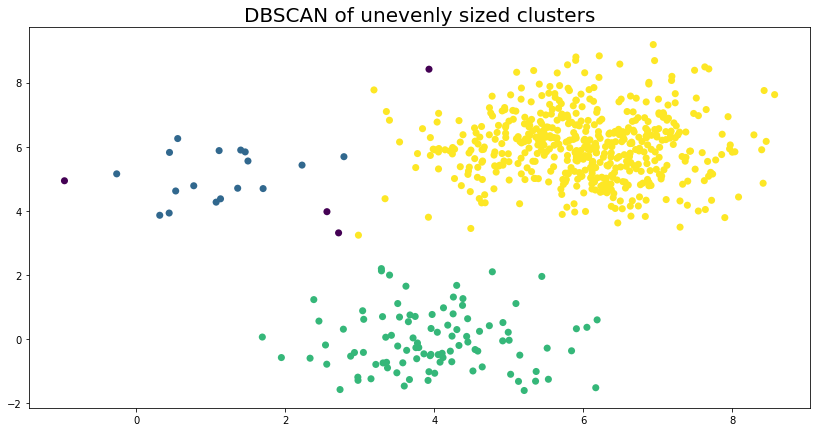

In [15]:
db = DBSCAN(eps=1.1, min_samples=6).fit(df1)
labels =  db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
x = df1.values[:,1]
y = df1.values[:,2]
cmap = plt.cm.rainbow
#norm = mc.BoundaryNorm(labels, cmap.N)
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=labels,cmap='viridis',s=50,edgecolor='none')
plt.title('DBSCAN of unevenly sized clusters', fontsize = 20)
plt.show()

We can from the plot that the DBSCAN clustering method can find the cluster in this unevenly distributed data, and even find the outliers (the dark dots).

### 4-b Non-spherical distribution
This is the same data run above with K-mean clustering. We are running it with DBSCAN clustering

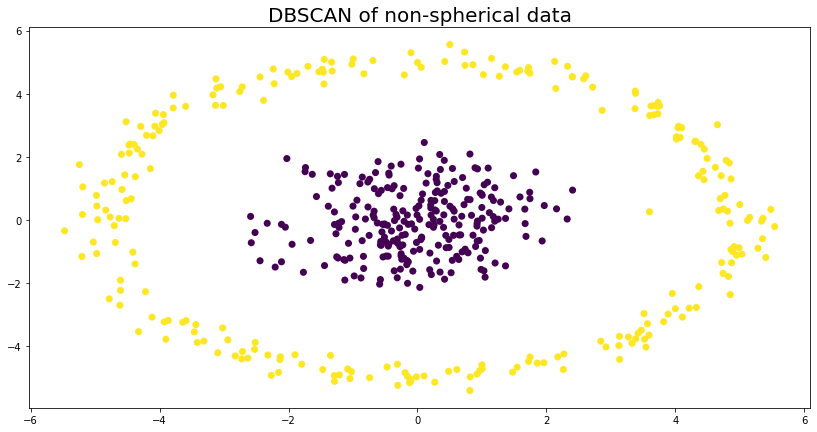

In [21]:
import matplotlib.colors as mc
db = DBSCAN(eps=1.1, min_samples=5).fit(exp2)
labels =  db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
x = exp2.values[:,1]
y = exp2.values[:,0]
cmap = plt.cm.rainbow
#norm = mc.BoundaryNorm(labels, cmap.N)
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=labels,cmap='viridis',s=50,edgecolor='none')
plt.title('DBSCAN of non-spherical data', fontsize = 20)
plt.show()

Again, the DBSCAN clustering method is able to properly find the clusters in non-spherical data set, which was difficult for K-means clustering methods. Thus, the issue of the non-spherical distribution of the data is solved using the DBSCAN method.

### 5-c Non-spherical data with outliers
In the last study case, non-spherical data with outliers. First, we plot the outlies to check in the following step if DBSCAN can distinguish these outliers from the true data (clusters)

   #### Detrmination of the outliers
  First, let's find the outliers in this data set then run the DBSCAN algorithm and check if it is able to distinguish the outliers from the data

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norms = scaler.fit_transform(labels.reshape(-1,1))

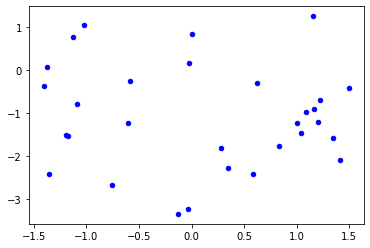

In [31]:
x[labels==-1]
plt.scatter(x[np.where(labels==-1)], y[np.where(labels==-1)], c='b', s=20)

Let's now run the DBSCAN clustering algorithm with this non-spherical data with outliers to explore its efficiency:

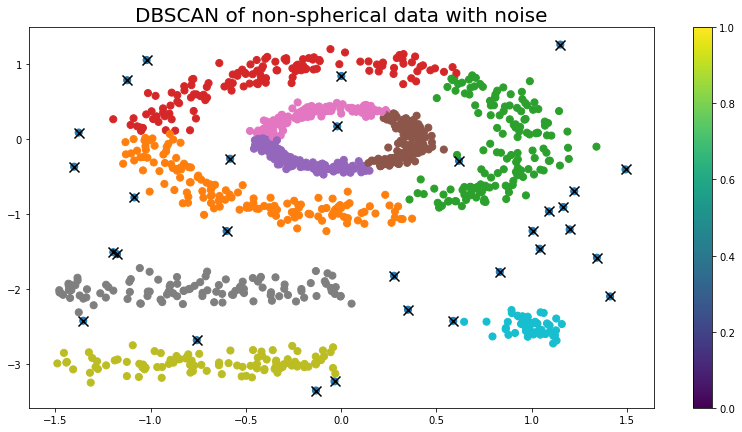

In [24]:
db = DBSCAN(eps=0.155, min_samples=5).fit(df3)
labels =  db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
x = df3.values[:,0]
y = df3.values[:,1]

cmap = plt.cm.rainbow
#norm = mc.BoundaryNorm(labels, cmap.N)

plt.figure(figsize=(14,7))
plt.scatter(x, y, c=labels, cmap='tab10', s=50)
plt.scatter(x[np.where(labels==-1)], y[np.where(labels==-1)], c='k', marker='x', s=100)
plt.title('DBSCAN of non-spherical data with noise', fontsize = 20)
plt.colorbar()
plt.show()

It is clear from the generated plot that DBSCAN can do better with non-spherical data with outliers. The outliers are eliminated from the clusters and they are presented as crossed blue dots, which was not possible to do with the K-means clustering.


## Results and Discussion
The project demonstrated the limitations of k-means clustering with three different data distributions. The DBSCAN clustering method was a solution for these three challenging data distributions for K-means clustering.

K-means clustering failed to:

    1- To find the proper clusters in unevenly distributed data.
    2- To find and separate the outliers from the clusters.
    
Advantages of DBSCAN over Kmeas clustering:

    1- DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.
    2- DBSCAN can find arbitrarily shaped clusters.
    3- DBSCAN has a notion of noise and is robust to outliers.    
    4- DBSCAN can find clusters in non-spherical data distributions.
    5- DBSCAN requires just two parameters that can be set by a domain expert if the data is well understood.
       
    
    
## Summary

As a conclusion of our study, we were able to explore and demonstrate that:
    
   1-Kmeans clustering does not do a good job when the data is not spherically or evenly distributed, or data has outliers. These are three necessary assumptions for K-means clustering to be able to set the clusters properly.
   
   2-DBSCAN looks like a good solution where the above-mentioned assumptions are not found. DBSCAN was a solution to all these three cases where the K-means algorithm failed: unevenly distributed data, non-spherical distribution, and non-spherical with outliers data.
   
In the cases where all three assumptions for K-mean clustering are not applied, DBSCAN clustering can be a solution.

## Citations

Nomidl. (2022, August 5). Difference between K-means and DBSCAN clustering? Nomidl. Retrieved November 21, 2022, from https://www.nomidl.com/machine-learning/difference-between-k-means-and-dbscan-clustering/ 

J. (2020). T-DBSCAN - Spatiotemporal Density Clustering for GPS Trajectory Segmentation. Github. https://github.com/jayachithra/T-DBSCAN

Sharma, A. (2022). How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning. Analytics Vidya. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

### Parting Comments

This is a basic demonstration of how DBSCAN clustering can solve the case where K-mean clustering fails.

Much more can be done!

I am currently a second-year MSc student in Petroleum & Geosystems Engineering at The University of Texas at Austin, and I am supervised by Professor Kamy Sepehrnoori.
At UT, I am working on the simulation of the unconventional reservoir using microseismic data, fractures complex network calibration, history matching, and production forecasting. I have more than nine years of field experience wireline/logging field engineer in many locations in Algeria and Iraq. I am originally from Algeria!

I am experienced in the development and execution of projects and research at both university and field applications. I am interested in internship opportunities where I look forward to contributing with my academic knowledge,  technical experience, and positive thinking.
 

I hope this was helpful,

**Hana Bachi**
#### <font color=Orange> Hook 'em  </font> 

hnbachi@utexas.edu

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
